### In this checkpoint I am going to exploit all infos practised before , so I am goint to use different modal types and compare between them 

## Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Data vis

In [2]:
data = pd.read_csv("heart.csv",",")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

there is no nan value , and all the values are Numerical 

### Analysing the 'target' variable

In [6]:
data['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [7]:
data["target"].unique()


array([1, 0], dtype=int64)

it is clear that this is a classification problem with target variable having values 0 or 1 

### Checking correlation between columns


In [8]:
data.corr()["target"].abs().sort_values(ascending=False)


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

This shows that most columns are moderately correlated with target

## Exploratory Data Analysis (EDA)

### analysing the target variable:¶


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    165
0    138
Name: target, dtype: int64


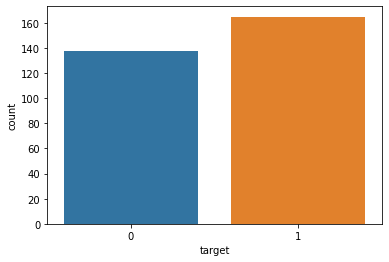

In [9]:
y = data["target"]
sns.countplot(y)
target_temp = data.target.value_counts()

print(target_temp)

In [10]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### second, analysing selected features : 


In [11]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

the cp feature has valus from 0 to 3

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

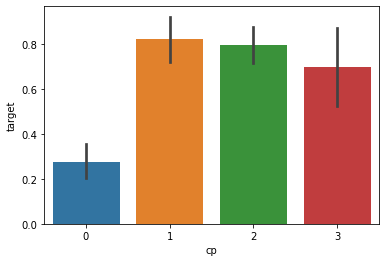

In [12]:
sns.barplot(data["cp"],y)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the 'Sex' feature


In [13]:
data["sex"].unique()


array([1, 0], dtype=int64)

We notice, that as expected, the 'sex' feature has 2 unique features



D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

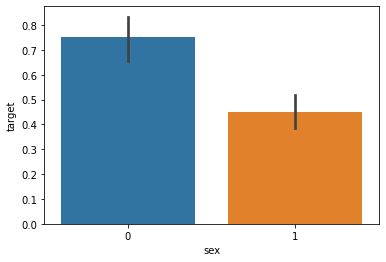

In [14]:
sns.barplot(data["sex"],y)

We notice, that females are more likely to have heart problems than males

### Analysing the FBS feature


In [15]:
data["fbs"].describe()


count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [16]:
data["fbs"].unique()

array([1, 0], dtype=int64)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

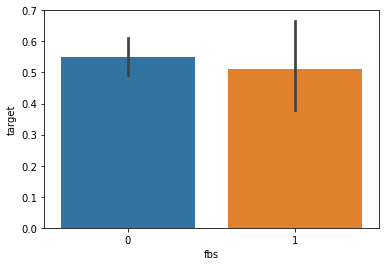

In [17]:
sns.barplot(data["fbs"],y)

No new info ! 

### Analysing the restecg feature

In [18]:
data["restecg"].unique()

array([0, 1, 2], dtype=int64)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

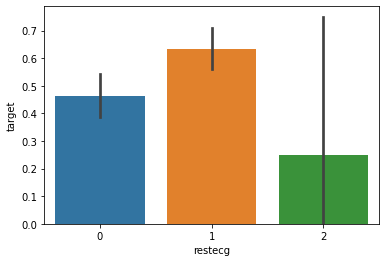

In [19]:
sns.barplot(data["restecg"],y)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the Slope feature


In [20]:
data["slope"].unique()


array([0, 2, 1], dtype=int64)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

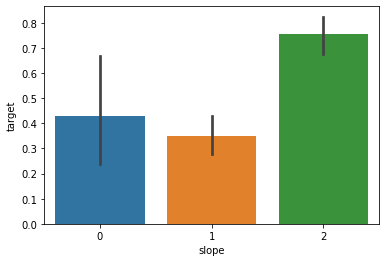

In [21]:
sns.barplot(data["slope"],y)


We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature


In [22]:
#number of major vessels (0-3) colored by flourosopy
data["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

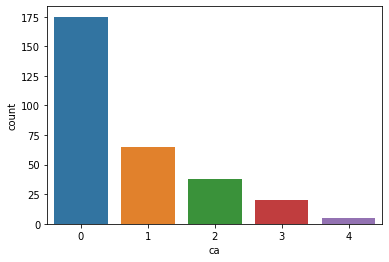

In [23]:
sns.countplot(data["ca"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

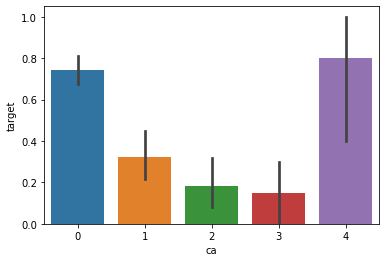

In [24]:
sns.barplot(data["ca"],y)


ca=4 has astonishingly large number of heart patients¶


# Split data



In [25]:
X = data.drop("target",axis=1)
Y = data["target"]
Y.skew()

-0.17982105403495655

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

##### I am going to use different methods to comapre between their accuracy  

## Logistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy using Logistic Regression is: "+str(score_lr)+" %")

The accuracy using Logistic Regression is: 85.25 %


## K Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [30]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy using KNN is: "+str(score_knn)+" %")

The accuracy using KNN is: 67.21 %


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [32]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy using Decision Tree is: "+str(score_dt)+" %")

The accuracy using Decision Tree is: 81.97 %


# Compare betwenn the results : 


In [39]:

results = [score_lr,score_knn,score_dt]
print(results)

[85.25, 67.21, 81.97]


In [40]:
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree"]  

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

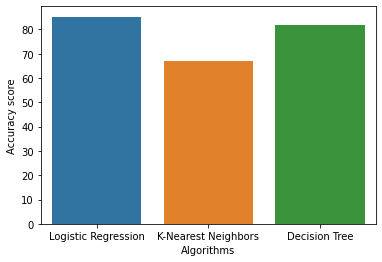

In [41]:

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,results)

### there Logistic regression has good result as compare to other algorithms